In [1]:
import jax 
import jax.numpy as jnp
import seaborn as sns
import matplotlib.pyplot as plt

try:
    from probml_utils import latexify, savefig, is_latexify_enabled
except ModuleNotFoundError:
    %pip install git+https://github.com/probml/probml-utils.git
    from probml_utils import latexify, savefig, is_latexify_enabled

jax.config.update("jax_enable_x64", True)

try:
    import tinygp
except ModuleNotFoundError:
    %pip install -qqq tinygp
    import tinygp

try:
    import jaxopt
except ModuleNotFoundError:
    %pip install jaxopt
    import jaxopt

from tinygp import GaussianProcess, kernels
import numpy as np
latexify(width_scale_factor=1, fig_height=2)
marksize = 10 if is_latexify_enabled() else 30

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/probml/probml-utils.git to /tmp/pip-req-build-7vdzfsol
  Running command git clone -q https://github.com/probml/probml-utils.git /tmp/pip-req-build-7vdzfsol
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 88 kB 4.7 MB/s 
     |████████████████████████████████| 272 kB 54.3 MB/s 
     |████████████████████████████████| 119 kB 59.0 MB/s 
     |████████████████████████████████| 72 kB 786 kB/s 
     |████████████████████████████████| 1.1 MB 51.8 MB/s 
  Created wheel for probml-utils: filename=probml_utils-0.1.dev75+g8040850-py3-none-any.whl size=99406 sha256=b56e41630200f080340d773630941854078e5cbe4ee67c30b914d659e404715f
  Stored in directory: /tmp/pip-ephem-wheel-cache-esybk1tu/wheels/37/8f/cb/b845cd5de3d7f648717815f9c27bec49975bf58637a97fa6be
  

/usr/local/lib/python3.7/dist-packages/probml_utils/plotting.py:26: UserWarning: LATEXIFY environment variable not set, not latexifying
  warnings.warn("LATEXIFY environment variable not set, not latexifying")


/usr/local/lib/python3.7/dist-packages/probml_utils/plotting.py:80: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")


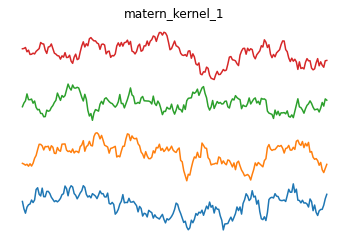

/usr/local/lib/python3.7/dist-packages/probml_utils/plotting.py:80: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")


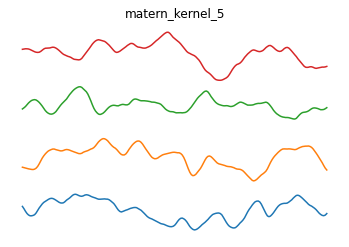

/usr/local/lib/python3.7/dist-packages/probml_utils/plotting.py:80: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")


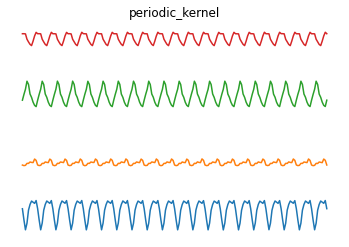

/usr/local/lib/python3.7/dist-packages/probml_utils/plotting.py:80: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")


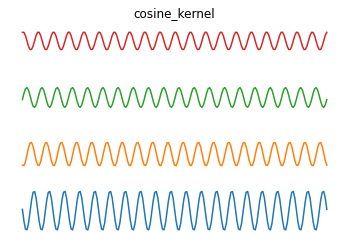

In [2]:
def gpKernelPlot(seed):
  if(seed ==1):
    return
  n_xstar = 201
  x_range = np.linspace(-10,10,n_xstar).reshape(-1,1)
  numerical_noise = 1e-5
  k = kernels.Matern52(scale=1.0)
  gp = GaussianProcess(k,x_range,diag=numerical_noise)


  matern_kernel_1 = kernels.Exp(scale=1.0)
  matern_kernel_5 = kernels.Matern52(scale=1.0)
  periodic_kernel = kernels.ExpSineSquared(scale = 1.0,gamma=jnp.array(2.0))
  cosine_kernel = kernels.Cosine(scale=1.0)

  kernel_names = {
          "matern_kernel_1": matern_kernel_1,
          "matern_kernel_5": matern_kernel_5,
          "periodic_kernel": periodic_kernel,
          "cosine_kernel": cosine_kernel,
      }

  for kernel_name in kernel_names:
    kernel = kernel_names[kernel_name]
    gp = GaussianProcess(kernel,x_range,diag=numerical_noise)
    samples = jnp.atleast_2d(gp.sample(jax.random.PRNGKey(0),shape = (4,)).T)
    samples = samples + jnp.tile(jnp.arange(1, 4 + 1, 1) * 5 - 10, (n_xstar, 1))
    plt.plot(x_range, samples)
    plt.title(kernel_name, fontsize=12)
    sns.despine()
    plt.axis("off")
    savefig("gpKernelPlot_{}_latexified".format(kernel_name))
    plt.show()
  
gpKernelPlot(2)

